# Stock Portfolio Otimization 

## Table of Contents
- [Introduction](#section_1)
- [Goal and Objectives](#section_2)
- [Data Information](#section_3)
    - [Data Cleaning](#section_3.1)
- [Exploratory Data Analysis](#section_4)
- [Portfolio Optimization](#section_5)
    - [Stock Portfolios at the Efficient Frontier](#section_5.1)
    - [Effect of Adding or Removing Assets on the Portfolio](#section_5.2)
- [Recommendations](#section_6)

## Introduction <a id="section_1"></a>

This project implements the Modern Portfolio Theory using the Python programming language. Harry Markowitz introduced Modern Portfolio Theory in 1952 to help investors construct portfolios that optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward.

At the center of this theory is the efficient frontier, which indicates the combination of investments that will provide the highest level of return for the lowest level of risk and is represented by a line. To know more about this theory, [click here](https://www.investopedia.com/terms/m/modernportfoliotheory.asp).

## Goal and Objectives <a id="section_2"></a>

The goal of this project is to select an optimized portfolio from a given number of stock investments. The objectives are the following:
- find multiple set of stock asset combinations.
- determine the expected returns and volatilitys of these set of portfolios
- choose the optimal allocation of each asset in the portfolio based on the investor's risk level.

## Data Information <a id="section_3"></a>

The data was retrieved from the [Market Watch](https://www.marketwatch.com/) and shows the daily stock prices of five select stocks of publicly listed companies in the Philippine Stock Exchange Index starting from January 20217 to December 2022.



The companies that will be used for this analysis are the following:

| Ticker Symbol | Company Name |
| ----- | ----- |
|PGOLD | Puregold |
| SECB | Security Bank |
| MWC | Manila Water Company |
| PHN | Phinma Corporation |
| AEV | Aboitiz Equity Ventures |

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

%matplotlib inline

Since the data for each stocks was in separate sheet, I will first load the data of the five stocks that will be used for this project. I will then merge them into a single dataframe.

In [2]:
#load data
pgold = pd.read_excel('historical_data.xlsx', 'PGOLD')
aev = pd.read_excel('historical_data.xlsx', 'AEV')
phn = pd.read_excel('historical_data.xlsx', 'PHN')
secb = pd.read_excel('historical_data.xlsx', 'SECB')
mwc = pd.read_excel('historical_data.xlsx', 'MWC')

In [3]:
#view data
pgold.head()

,Date,PGOLD
0,12/29/2022,"""34.90"""
1,12/28/2022,"""34.95"""
2,12/27/2022,"""33.85"""
3,12/23/2022,"""33.90"""
4,12/22/2022,"""34.00"""


### Data Cleaning  <a id='section_3.1'> </a>

After viewing my data, I noticed that the stock price values were treated as an object data type, so I will do some data cleaning before I proceed with my analysis. I also decided to set the `Date` column into an index since I will not really need it in my calculation.

In [4]:
df = pgold.merge(aev).merge(phn).merge(secb).merge(mwc)
df.head()

,Date,PGOLD,AEV,PHN,SECB,MWC
0,12/29/2022,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10"""
1,12/28/2022,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50"""
2,12/27/2022,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00"""
3,12/23/2022,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92"""
4,12/22/2022,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00"""


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1331 non-null   object
 1   PGOLD   1331 non-null   object
 2   AEV     1331 non-null   object
 3   PHN     1331 non-null   object
 4   SECB    1331 non-null   object
 5   MWC     1331 non-null   object
dtypes: object(6)
memory usage: 72.8+ KB


In [6]:
#change the date to index
df = df.set_index('Date')
df.head()

In [8]:
#remove double quotes and change columns to float
df = df.replace('"', '', regex=True)
df = df.apply(pd.to_numeric)
df.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,34.90,57.70,19.06,87.0,19.10
12/28/2022,34.95,57.75,19.00,88.5,18.50
12/27/2022,33.85,56.20,19.00,88.1,19.00
12/23/2022,33.90,56.80,19.00,87.8,18.92
12/22/2022,34.00,57.00,19.00,88.6,19.00


In [9]:
#recheck data types
df.dtypes

PGOLD    float64
AEV      float64
PHN      float64
SECB     float64
MWC      float64
dtype: object

Now that the values were already changed into float, I can now proceed with my analysis.

## Exploratory Data Analysis <a id="section_4"></a>

For the Exploratory Data Analysis (EDA), I will get the basic statistics for each stock investments in the dataset as well as look for correlation among these assets.

In [10]:
#statistics of the dataset
df.describe()

,PGOLD,AEV,PHN,SECB,MWC
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,42.107137,55.709842,11.858775,156.075056,21.407829
std,5.950872,11.472118,4.251213,53.861593,6.444024
min,26.700000,29.100000,7.500000,78.100000,6.000000
25%,38.050000,47.600000,8.980000,108.600000,15.580000
50%,42.500000,54.100000,9.900000,145.800000,21.550000
75%,46.375000,62.450000,14.200000,201.000000,27.000000
max,54.900000,79.000000,21.150000,266.800000,33.050000


<Axes: >

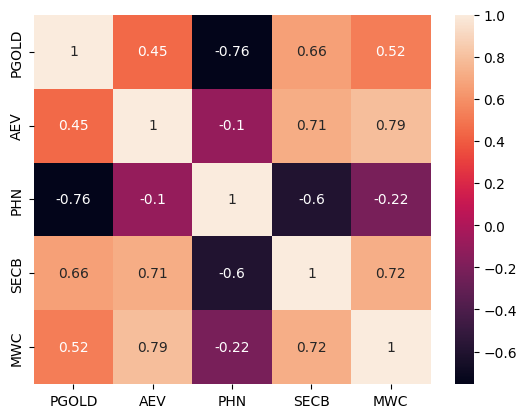

In [11]:
#check for correlation
sns.heatmap(df.corr(), annot=True)

The heatmap above displays the correlation of the stocks. It can be seen that PHN stock is negatively correlated with the rest of the stocks in the dataset while SECB is positively correlated with most of the assets. 

<Axes: >

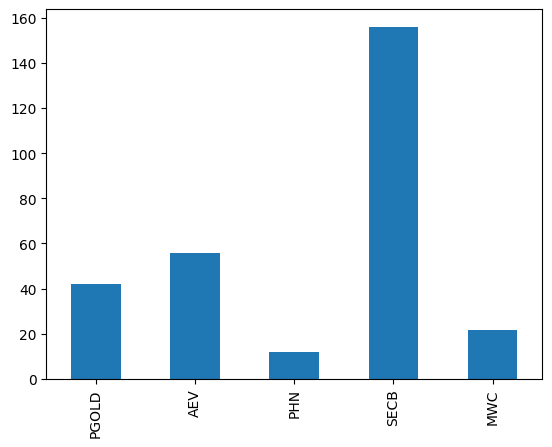

In [12]:
#plot average prices of the stocks
df.mean().plot(kind='bar')

Based on the bar graph above, `SECB` has the highest average price among the stocks included in the dataset while `PHN` have the lowest average stock price. A stock price indicates the current value of a stock to buyers and sellers, but it does not necessary reflect the stock's intrinsic value. Note that investors would usually prefer undervalued stocks over overvalued stocks specially if it have higher potential to grow over time.

## Portfolio Optimization <a id="section_5"></a>

In this section, I will now analyze the best stock allocations using the MPT. First, I will find a set of portfolios and calculate their returns, volatility, and weight allocations for each stock. I will then plot them into a graph. Lastly, I will find the optimal allocation for each stock and plot them in an interactive plot.

Note that the formula for the expected return is 
$$\operatorname {E} (R_{p})=\sum _{i}w_{i}\operatorname {E} (R_{i})\quad$$

where 

$R_{p}$
 is the return on the portfolio, 
$R_{i}$
 is the return on asset i and 
$w_{i}$
 is the weighting or proportion of component asset i, so that 
$${\displaystyle \sum _{i}w_{i}=1}$$

As for the portfolio variance, the formula is
$${\displaystyle \sigma _{p}^{2}=\sum _{i}w_{i}^{2}\sigma _{i}^{2}+\sum _{i}\sum _{j\neq i}w_{i}w_{j}\sigma _{i}\sigma _{j}\rho _{ij}}$$

where 

$\displaystyle \sigma _{i}$
 is the (sample) standard deviation of the periodic returns on an asset i, and 
$\rho _{ij}$
 is the correlation coefficient between the returns on assets i and j.

In [13]:
#this will compute log percentage change
daily_pct_change = df.pct_change().apply(lambda x: np.log(1+x))
daily_pct_change.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,NaN,NaN,NaN,NaN,NaN
12/28/2022,0.001432,0.000866,-0.003153,0.017094,-0.031918
12/27/2022,-0.031979,-0.027207,0.000000,-0.004530,0.026668
12/23/2022,0.001476,0.010620,0.000000,-0.003411,-0.004219
12/22/2022,0.002946,0.003515,0.000000,0.009070,0.004219


In [14]:
#log of cov matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,PGOLD,AEV,PHN,SECB,MWC
PGOLD,0.000396,0.000104,0.000010,0.000077,0.000079
AEV,0.000104,0.000644,0.000020,0.000121,0.000084
PHN,0.000010,0.000020,0.000357,0.000037,0.000025
SECB,0.000077,0.000121,0.000037,0.000441,0.000123
MWC,0.000079,0.000084,0.000025,0.000123,0.000780


In [15]:
#changed index to datetime index as resample function is only valid with datetime index
df.index=pd.to_datetime(df.index)

#this will compute annual average returns
average_returns = df.resample('Y').last().pct_change().mean()

PGOLD   -0.067512
AEV     -0.038170
PHN      0.228759
SECB    -0.163811
MWC      0.047371
dtype: float64

In [19]:
#this will find the annual log covariance
ann_cov = df.pct_change().apply(lambda x: np.log(1+x)).cov()*250
ann_cov

,PGOLD,AEV,PHN,SECB,MWC
PGOLD,0.099038,0.026057,0.002577,0.019236,0.019635
AEV,0.026057,0.161002,0.004964,0.030234,0.021005
PHN,0.002577,0.004964,0.089230,0.009354,0.006317
SECB,0.019236,0.030234,0.009354,0.110333,0.030797
MWC,0.019635,0.021005,0.006317,0.030797,0.195094


In [21]:
# Volatility is given by the annual standard deviation. I will multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

PGOLD    0.314703
AEV      0.401250
PHN      0.298714
SECB     0.332164
MWC      0.441695
dtype: float64

<Axes: >

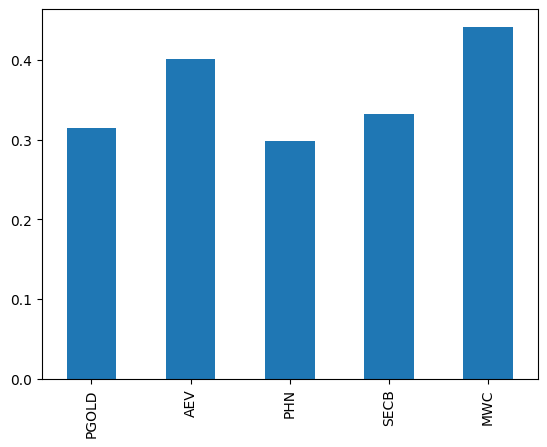

In [22]:
#bar showing the standard deviation of each stock
ann_sd.plot(kind='bar')

In [23]:
#create dataframe for returns and volatility
assets = pd.concat([average_returns, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
PGOLD,-0.067512,0.314703
AEV,-0.038170,0.401250
PHN,0.228759,0.298714
SECB,-0.163811,0.332164
MWC,0.047371,0.441695


In [24]:
# Define an empty array for portfolio returns, portfolio volatility, and asset weights
portfolio_returns = [] 
portfolio_volatility = []  
portfolio_weights = []   

num_assets = len(df.columns)
num_portfolios = 5000

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    portfolio_weights.append(weights)
    # Find the product of individual expected returns and its weights for each stock
    returns = np.dot(weights, average_returns) 
    portfolio_returns.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var)
    # Annualize standard deviation
    ann_sd = sd*np.sqrt(250) 
    portfolio_volatility.append(ann_sd)

In [25]:
data = {'Returns':portfolio_returns, 'Volatility':portfolio_volatility}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in portfolio_weights]

# Dataframe of the 5000 portfolios created
portfolios = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,PGOLD weight,AEV weight,PHN weight,SECB weight,MWC weight
0,0.013455,0.201122,0.181633,0.021059,0.283527,0.296791,0.216990
1,0.030269,0.217865,0.204761,0.070671,0.232596,0.140750,0.351222
2,0.014254,0.191345,0.205523,0.213022,0.295398,0.212451,0.073606
3,-0.002175,0.265525,0.173981,0.153006,0.054881,0.125130,0.493003
4,-0.013665,0.227710,0.418254,0.059946,0.092417,0.116589,0.312795


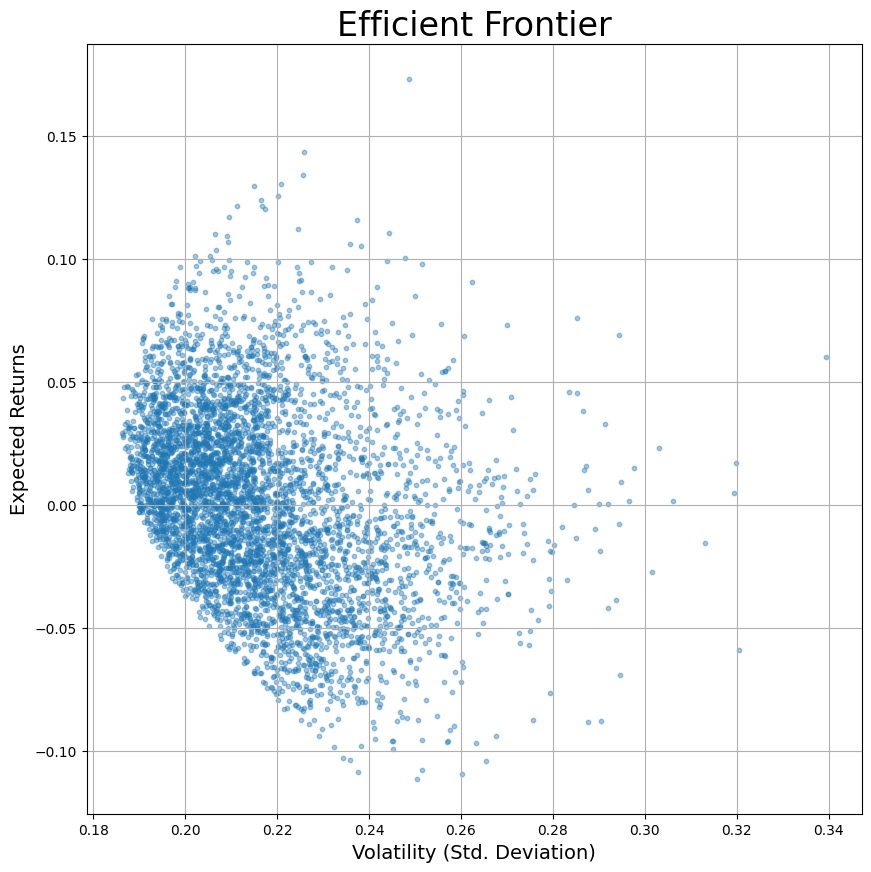

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.4, grid=True, figsize=[10,10])
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Random Portfolios', fontsize=24)
plt.show()
plt.clf()

In [27]:
#retrive the columns returns and volatility in the portfolio dataframe
mean_std_pairs = portfolios[['Returns','Volatility']]
mean_std_pairs.head()

,Returns,Volatility
0,0.013455,0.201122
1,0.030269,0.217865
2,0.014254,0.191345
3,-0.002175,0.265525
4,-0.013665,0.227710


In [28]:
#transform it into an array
mean_std_pairs = np.array(mean_std_pairs)
mean_std_pairs

array([[ 0.01345457,  0.20112188],
       [ 0.0302685 ,  0.21786519],
       [ 0.01425382,  0.19134456],
       ...,
       [ 0.04770917,  0.22224761],
       [-0.02274443,  0.19865632],
       [ 0.01537278,  0.22036697]])

### Stock Portfolios at the Efficient Frontier <a id="section_5.1"></a>

As stated previously, the efficient frontier is a set of investment portfolios that provide the highest expected returns for a given level of risk. These portfolios lie at the upper edge of the graph. Another useful metric that I will use is the Sharpe Ratio. 

__Sharpe Ratio__ is used to evaluate the performance of an investment as it measures the risk-adjusted return. A higher Sharpe ratio indicates that an investment has provided higher returns for the amount of risk taken.

The formula for the Sharpe Ratio is:

Sharpe Ratio = (Portfolio Return - risk-free rate) / portfolio standard deviation

#### Minimum Volatility Portfolio

A minimum volatility portfolio is the portfolio with the lowest risk or volatility.

In [29]:
# use idxmin() to find the minimum value in the column specified. 
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
                              
min_vol_port

Returns         0.029103
Volatility      0.186243
PGOLD weight    0.254065
AEV weight      0.125962
PHN weight      0.340154
SECB weight     0.189436
MWC weight      0.090384
Name: 3333, dtype: float64

The result above shows the weight allocations of each stock for an minimum volatiliy portfolio as well as their expected risk and return. We can see that the highest weight was allocated to the PHN stock, which is 34%. It is followed by a weight allocation of 25%, 19%, 13%, and 9% for the PGOLD, SECB, AEV, and MWC stocks, respectively. This stock portfolio has an expected return of 2.91% and a volatility of 18.62%. This return is considered as very low relative to the risk of the portfolio.

#### Optimal Risky Portfolio 

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [30]:
# Finding the optimal portfolio
rf = 0.01 # risk_free_rate

#find the portfolio with the highest sharpe ratio using formula and idxmax()
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.173438
Volatility      0.248689
PGOLD weight    0.044336
AEV weight      0.012570
PHN weight      0.801074
SECB weight     0.061887
MWC weight      0.080133
Name: 3422, dtype: float64

The result above shows the weight allocations of each stock for an optimal risky portfolio as well as their expected risk and return. We can see that the highest weight was allocated to the PHN stock, which is 80% while the rest of the stocks only have less than 10% weight allocation. This stock portfolio has an expected return of 17.34% and a volatility of 24.87%.

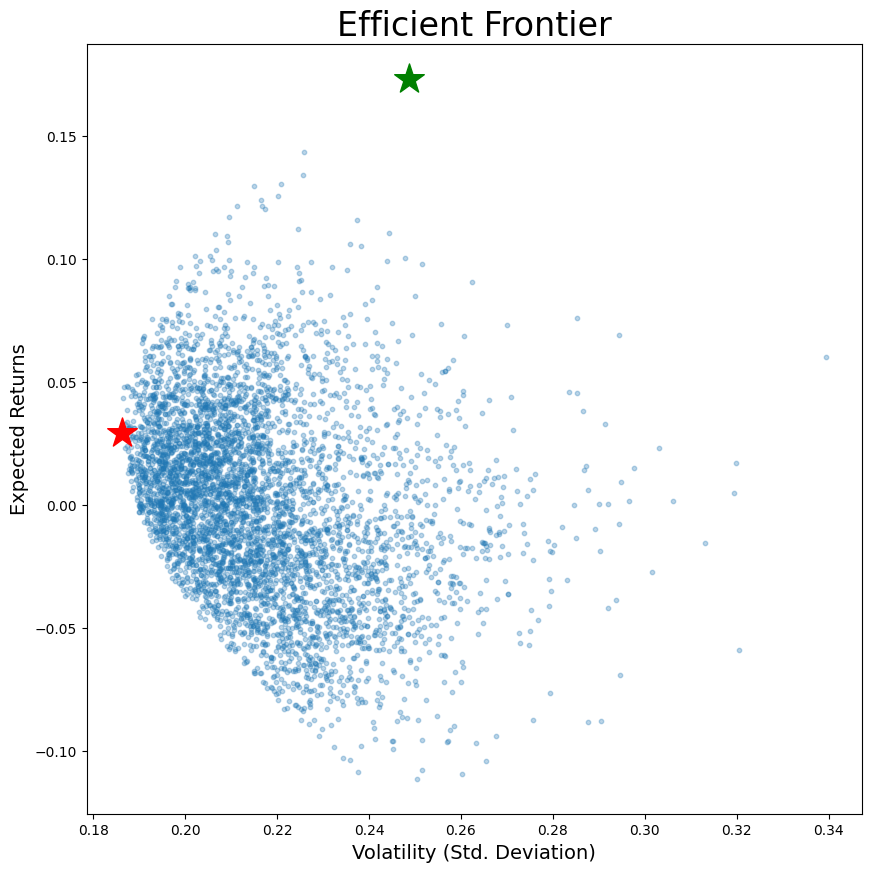

<Figure size 640x480 with 0 Axes>

In [31]:
# This will plot the minimum volatility and optimal risky portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()
plt.clf()

The red star in the figure above represents the portfolio with the least volatility while the green star represents the optimal risky portfolio.

### Effect of Adding or Removing Assets on the Portfolio <a id='section_5.2'></a>

Adding or removing assets on a portfolio may result in a shift on the efficient frontier. Specifically, these are the potential effects of adding or removing assets on a portfolio:

1. Adding assets to the portfolio:
    - If you add an asset that has a lower correlation with the existing assets, the efficient frontier may shift outward, indicating that there are now more efficient portfolio combinations available that offer higher expected returns for the same level of risk, or lower risk for the same level of expected returns.
    - If you add an asset that has a higher correlation with the existing assets, the efficient frontier may not shift significantly, but the shape of the efficient frontier may change. This is because the addition of a highly correlated asset does not provide much diversification benefit.
2. Removing assets from the portfolio:
    - If you remove an asset that has a low correlation with the remaining assets, the efficient frontier may shift inward, indicating that there are now fewer efficient portfolio combinations available that offer the same level of expected returns for a given level of risk, or higher risk for a given level of expected returns.
    - If you remove an asset that has a high correlation with the remaining assets, the efficient frontier may not shift significantly, but the shape of the efficient frontier may change. This is because the removal of a highly correlated asset does not provide much diversification benefit.
    
As an example, I will remove one asset from the set of portfolios and see what will be the effect to the efficient frontier.

In [37]:
#- Number of assets to include in the portfolio
n_assets = 4

mean_variance_pairs = []
portfolio_weights=[]
tickers_list=[]

for i in tqdm(range(10000)):
    next_i = False
    while True:
        #choose random assets
        assets = np.random.choice(list(daily_pct_change.columns), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #compute portfolio return and variance for each asset pairs
        portfolio_variance = 0
        portfolio_return = 0
        for i in range(len(assets)):
            portfolio_return += weights[i] * average_returns.loc[assets[i]]
            for j in range(len(assets)):
                portfolio_variance += weights[i] * weights[j] * ann_cov.loc[assets[i], assets[j]]

        
        #skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_return) & (V < portfolio_variance):
                next_i = True
                break
        if next_i:
            break

        #add the mean-variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_return, portfolio_variance])
        portfolio_weights.append(weights)
        tickers_list.append(assets)
        break

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3430.68it/s]


In [38]:
#create an array of the mean-variance pairs
mean_variance_pairs = np.array(mean_variance_pairs)

#sample risk free rate
risk_free_rate=0.01

#plot the efficient frontier
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      text=[str(np.array(tickers_list[i])) + "<br>" + str(np.array(portfolio_weights[i]).round(2)) for i in range(len(tickers_list))]))
fig1.update_layout(template='plotly_white',
                  xaxis=dict(title='Volatility (Std. Deviation)'),
                  yaxis=dict(title='Expected Returns'),
                  title='Portfolios at the Efficient Frontier',
                  width=850,
                  height=500)

pio.show(fig1)

Based on the efficient frontier above, I found out the removing one asset have increased the expected return of the portfolio. At the right side of the efficient frontier, there is a point where the expected return of the portfolio is 19.50% while the standard deviation is 0.26. In this portfolio, the stock `SECB` was removed. Remember that `SECB` has high positive correlation to the rest of the assets thus removing it did not cause significant change in the efficient frontier. Removing it from the portfolio, however, caused a 2.16% increase in the expected return while the volatility only increased by 0.01, which is still considered as an improvement in the portfolio.

__New Optimal Risky Portfolio__

| Stock Symbol | Weight |
| ----- | ----- |
| PGOLD| 2% |
| AEV | 5% |
| PHN | 85% |
| MWC | 8% |

### Recommendations <a id='section_6'></a>
Based on the analysis above, we have identified two optimal portfolios based on an investor's risk tolerance.

__Portfolio Recommendation for a Risk Averse Investor:__

| Stock Symbol | Weight |
| ----- | ----- |
| PGOLD| 25% |
| AEV | 13% |
| PHN | 34% |
| SECB | 19% |
| MWC | 9% |

This portfolio would give an expected return of 2.91%. The volatility of this portfolio on the other hand is 0.19.

__Portfolio Recommendation for a Risk Loving Investor:__

__Optimal Risky Portfolio__

| Stock Symbol | Weight |
| ----- | ----- |
| PGOLD| 2% |
| AEV | 5% |
| PHN | 85% |
| MWC | 8% |

This portfolio would give an expected return of 19.50%. The volatility of this portfolio on the other hand is 0.26.


